# Konto Mieszkaniowe

Ten sam dokument możesz zobaczyć w 
[colab.research.google.com](https://colab.research.google.com/github/swiety/konto_mieszkaniowe/blob/main/konto-mieszkaniowe.ipynb)
z poprawnie zrenderowanymi kolorowymi tabelami.

## Podsumowanie

* na pierwsze mieszkanie (z wyjątkami) dla osób od 13 do 45 roku życia.
* oszczędzanie 3-10 lat, potem max 5 lat na zakup mieszkania/nieruchomości.
* wymaga regularnego (min. 11 miesięcznych rat każdego roku, każda od 500-2000 zł).
* państwo gwarantuje premię (po spełnieniu warunków) w wysokości inflacji lub wzrostu cen mieszkań (większy z tych wskaźników), `1% < premia < 15%`.
* przy czym bank prowadzący pobiera prowizję w wysokości 1% naliczonej premii mieszkaniowej przy jej wypłacie.
* dodatkowo bank wypłaca odsetki w wysokści co najmniej 75% standardowej ofery lokaty banku.  Od tych odsetek nie płacimy podatku Belki.
* max. jedno konto na osobę, przy czym konto jest prowadzone w imieniu dziecka a nie rodzica w przypadku niepełnoletnich dzieci.

## Podstawa Prawna

* Ustawa z dnia 26 maja 2023 r. o pomocy państwa w oszczędzaniu na cele mieszkaniowe ([Dz.U. poz. 1114](https://dziennikustaw.gov.pl/DU/2023/1114))
* Ustawa z dnia 1 października 2021 r. o rodzinnym kredycie mieszkaniowym i bezpiecznym kredycie 2% ([Dz. U. 2021 r. poz. 2133](https://isap.sejm.gov.pl/isap.nsf/DocDetails.xsp?id=WDU20210002133))

## Materiały

* [PierwszeMieszkanie.gov.pl](https://pierwszemieszkanie.gov.pl/)
* [gov.pl: Ministerstwo Rozwoju i Technologii: Konto Mieszkaniowe](https://www.gov.pl/web/rozwoj-technologia/konto-mieszkaniowe)
* [gov.pl: Ministerstwo Rozwoju i Technologii: Program Pierwsze Mieszkanie](https://www.gov.pl/web/rozwoj-technologia/pierwsze-mieszkanie)
* [bgk.pl: Konto Mieszkaniowe / Program Pierwsze Mieszkanie: O produkcie](https://www.bgk.pl/osoby-prywatne/mieszkalnictwo/konto-mieszkaniowe/#c28296)
* [bgk.pl: Konto Mieszkaniowe / Program Pierwsze Mieszkanie: Lista banków prowadzących Konto Mieszkaniowe](https://www.bgk.pl/osoby-prywatne/mieszkalnictwo/konto-mieszkaniowe/#c28304)
* [Subiektywnie o Finansach: W pierwszym banku już dziś założysz Konto Mieszkaniowe!](https://subiektywnieofinansach.pl/od-dzis-zalozysz-konto-mieszkaniowe-w-pierwszym-banki-warto/)
* [Marcin Iwuć: Konto Mieszkaniowe - czy to się opłaca?](https://marciniwuc.com/konto-mieszkaniowe/)
* [Bank Pekao: Konto Mieszkaniowe](https://www.pekao.com.pl/klient-indywidualny/oszczedzam-i-inwestuje/konto-mieszkaniowe.html)
* [Alior Bank: Konto Mieszkaniowe](https://www.aliorbank.pl/klienci-indywidualni/oszczednosci/konto-mieszkaniowe.html)


## Kod do wyliczenia szacowanych zysków

In [1]:
from konmiesz import *

## Test symulatora
Liczymy scenariusz ze stron rządowych [PierwszeMieszkanie.gov.pl](https://pierwszemieszkanie.gov.pl/), a konkretnie ten scenariusz:
<img src="https://www.gov.pl/photo/d64c123f-f6b6-4e32-982c-ae85680f408d" width="500"/>
Czyli:

* 3 lata oszczędzania
* po 1000zł miesięcznie
* przy 9.6% inflacji przez wszystkie 3 lata, wskaźnik wzrostu cen m2 nieistotny


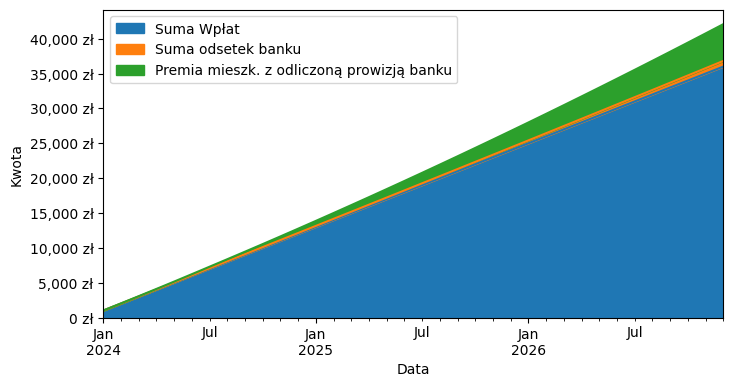

,Inflacja,Wzrostm2,Premia
Rok,,,
2024,9.60%,None,9.60%
2025,9.60%,None,9.60%
2026,9.60%,None,9.60%


In [2]:
wyswietl_symulacje(
    data_startu='2024-01', 
    ile_wplat=3*12, 
    wysokosc_wplat=1000,
    zalozenia=zalozenia_inflacji_i_wzrostu_m2(data_startu='2024',
        inflacja=[pct/100 for pct in [9.6] * 3], wzrost_m2=None
    ), 
    lokata=PEKAO)

## Założenia inflacji i wzrostu cen nieruchomości

Prognozy inflacji oparte o [Polski Instytut Ekonomiczny: Struktura inflacji CPI – prognoza PIE](https://pie.net.pl/prognozy/) i długoterminowy cel inflacyjny NBP (2.5%).  Konkretnie zakładam:
- inflacja 7.6% w 2024 (prognoza PIE)
- inflacja 4.3% w 2025 (ditto)
- infjacla 2.5% w kolejnych latach (długoterminowy cel inflacyjny NBP.  Brak wiarygodnych źródeł lepszej prognozy).

Dla prostoty na razie nie uwzględniam wzrostu cen nieruchomości, który w niektórych latach może przekraczać inflację i zwiększyłby wysokość premii mieszkaniowej.

## Symulacja oszczędzania - bank Pekao
- otwieram konto w styczniu 2024
- przez 10 lat wpłacam po 1000zł miesięcznie

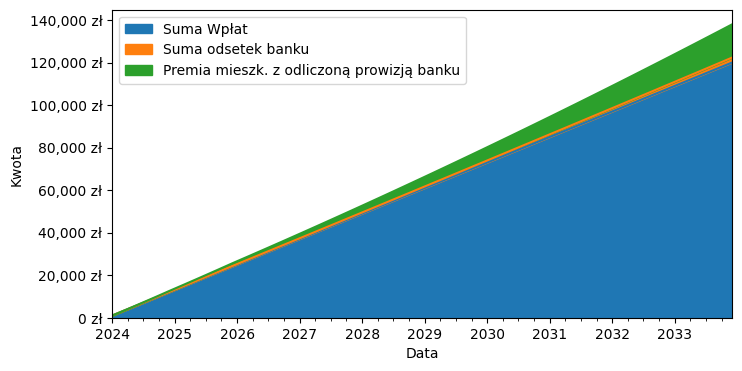

,Inflacja,Wzrostm2,Premia
Rok,,,
2024,7.60%,None,7.60%
2025,4.30%,None,4.30%
2026,2.50%,None,2.50%
2027,2.50%,None,2.50%
2028,2.50%,None,2.50%
2029,2.50%,None,2.50%
2030,2.50%,None,2.50%
2031,2.50%,None,2.50%
2032,2.50%,None,2.50%


In [3]:
wyswietl_symulacje(
    data_startu='2024-01',
    ile_wplat=10*12,
    wysokosc_wplat=1000,
    zalozenia=zalozenia_inflacji_i_wzrostu_m2(data_startu='2024',
        inflacja=[pct/100 for pct in [7.6, 4.3] + [2.5] * 8], wzrost_m2=None
    ), 
    lokata=PEKAO)

## Symulacja oszczędzania - bank Alior
- otwieram konto w styczniu 2024
- przez 10 lat wpłacam po 1000zł miesięcznie

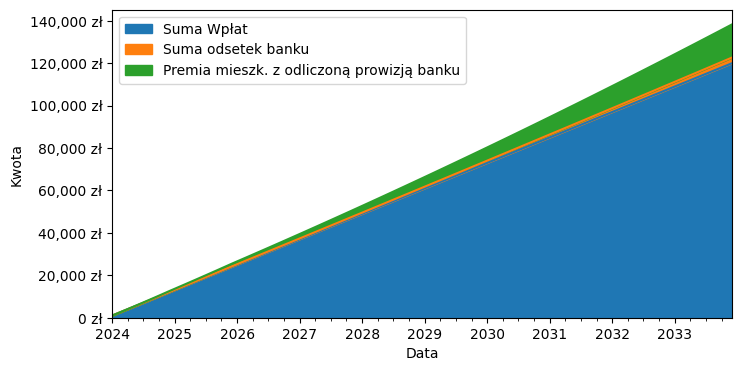

,Inflacja,Wzrostm2,Premia
Rok,,,
2024,7.60%,None,7.60%
2025,4.30%,None,4.30%
2026,2.50%,None,2.50%
2027,2.50%,None,2.50%
2028,2.50%,None,2.50%
2029,2.50%,None,2.50%
2030,2.50%,None,2.50%
2031,2.50%,None,2.50%
2032,2.50%,None,2.50%


In [4]:
wyswietl_symulacje(
    data_startu='2024-01',
    ile_wplat=10*12,
    wysokosc_wplat=1000,
    zalozenia=zalozenia_inflacji_i_wzrostu_m2(data_startu='2024',
        inflacja=[pct/100 for pct in [7.6, 4.3] + [2.5] * 8], wzrost_m2=None
    ), 
    lokata=ALIOR)